In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
credit_card_data = pd.read_csv('/content/creditcard_2023.csv')

In [ ]:
credit_card_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [ ]:
credit_card_data.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
319268,319268,-0.560567,-0.025828,0.154133,0.040989,0.004704,0.110562,-0.190605,0.074861,-0.064711,...,0.095637,0.195847,-0.686735,-0.124734,0.153993,-0.729910,0.020657,0.235600,7764.92,1.0
319269,319269,-0.405363,0.161204,-0.392087,0.029644,-0.545183,0.561205,0.231470,0.086945,-0.362831,...,0.153064,0.284142,0.155172,-1.093577,0.184470,-1.037166,0.484482,0.224061,21335.71,1.0
319270,319270,0.174302,0.718051,-0.837742,1.326130,0.574136,-1.650307,-0.060722,-0.096360,-0.829531,...,0.058115,-0.565562,-0.569280,0.082323,2.526888,1.090278,0.778165,1.174113,15056.35,1.0
319271,319271,-0.458412,0.151862,0.060476,0.379404,-0.202495,0.237072,-0.213610,-0.137582,-0.225903,...,0.310975,0.011905,-0.227962,0.312141,-0.047683,-0.681060,-0.467298,-0.833333,12007.97,1.0
319272,319272,0.837135,-0.204736,0.457407,-0.023081,0.560115,0.354794,0.641229,-0.192648,0.146062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [4]:
credit_card_data.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [5]:
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,284315


In [6]:
credit_card_data = credit_card_data.dropna(how='any')

In [7]:
credit_card_data.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [8]:
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,284315


In [9]:
Real = credit_card_data[credit_card_data.Class == 0]
Fraud = credit_card_data[credit_card_data.Class == 1]

In [10]:
print(Real.shape)
print(Fraud.shape)

(284315, 31)
(284315, 31)


In [34]:
Real.Amount.describe()

,Amount
count,284315.000000
mean,12026.313506
std,6929.500715
min,50.120000
25%,6034.540000
50%,11996.900000
75%,18040.265000
max,24039.930000


In [33]:
Fraud.Amount.describe()

,Amount
count,284315.000000
mean,12057.601763
std,6909.750891
min,50.010000
25%,6074.640000
50%,12062.450000
75%,18033.780000
max,24039.930000


In [32]:
credit_card_data.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


Under_Sampling

In [ ]:
#Real_sample = Real.sample(n = 500)
#Fraud_sample = Fraud.sample(n = 500)

Concatenate

In [ ]:
#New_Dataset = pd.concat([Real_sample, Fraud_sample],axis = 0)

In [ ]:
#New_Dataset.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27874,27874,0.050460,-0.152242,1.184621,-0.680207,0.276807,0.167649,0.601230,-0.102489,0.320093,...,-0.208914,-0.753887,-0.070495,-0.173306,-0.435917,0.200614,0.034184,0.093139,6972.73,0
55102,55102,0.984612,-0.464524,0.965907,-0.235952,0.146255,0.914476,0.238498,-0.091109,0.886823,...,-0.134629,-0.053372,-0.195318,-1.357037,0.864062,-0.857509,-0.154216,-0.056636,17968.16,0
264515,264515,1.917608,-0.407577,-0.213477,-0.564944,0.740772,0.071429,0.689220,-0.246484,0.563495,...,-0.079856,0.318395,-0.105425,0.277357,0.742164,1.490962,-0.362504,-0.305060,9590.19,0
236148,236148,0.264728,-0.366123,0.460797,-1.923970,0.416401,0.164504,0.666118,-0.263711,-0.153454,...,0.111322,1.533091,-0.278040,1.848759,-0.166266,-0.289716,-0.820748,-0.681113,7776.73,0
191687,191687,1.640760,-0.512754,0.240094,-0.126320,0.324547,0.878684,0.318148,-0.101818,1.061697,...,-0.304498,-1.041482,0.386594,0.336654,-0.507581,-3.068081,-0.178888,-0.185680,14937.80,0


In [ ]:
#New_Dataset.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
442013,442013,-0.482514,0.654223,-0.980648,0.605835,-0.569408,-0.230322,-0.213975,-0.105036,-0.595464,...,0.090731,0.947341,0.024474,-0.143965,-0.630332,-0.969543,0.445998,-0.387212,7401.52,1
362635,362635,0.985065,-0.055313,0.271792,0.443231,0.509134,-0.110267,0.549912,-0.201919,0.831898,...,-0.269375,-0.845591,-0.094638,-0.054336,0.833520,-0.084713,-0.260601,0.064972,7272.91,1
334043,334043,-0.242317,0.151858,-0.528623,-0.100015,0.187552,0.079166,-0.207039,0.142638,-0.639146,...,0.315684,1.144611,-0.260766,-0.367150,0.282980,1.574560,0.552865,0.401054,286.43,1
519205,519205,-0.889033,-0.189479,-0.736514,0.943820,-0.026626,-1.312199,-1.060424,0.326636,-0.857553,...,0.314876,0.114877,-1.074793,-0.788937,-0.637616,-0.295104,2.309219,0.974557,15271.58,1
303005,303005,-0.473091,0.510145,-0.084713,-0.169373,0.422186,1.387411,-0.221865,-1.843794,2.756632,...,2.809211,-1.735640,1.334430,-0.493134,-1.512477,-1.411553,-0.342728,-0.361132,9581.79,1


In [ ]:
#New_Dataset['Class'].value_counts()

,count
Class,
0,500
1,500


In [ ]:
#New_Dataset.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,137910.666,0.424984,-0.465916,0.694467,-0.752165,0.308166,0.416097,0.481802,-0.115275,0.643368,...,-0.227148,-0.119183,0.002085,-0.061127,0.139799,-0.065659,-0.055723,-0.172439,-0.106978,11620.45424
1,418952.188,-0.512032,0.460729,-0.651016,0.721161,-0.338383,-0.367753,-0.481153,0.143639,-0.555100,...,0.082932,0.139205,0.057902,0.042390,-0.166974,-0.036358,0.073565,0.229086,0.116816,12408.64996


Data Split


In [14]:
X = credit_card_data.drop (columns ='Class', axis = 1)
Y = credit_card_data['Class']

In [15]:
print(X)

            id        V1        V2        V3        V4        V5        V6  \
0            0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898   
1            1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2            2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3            3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4            4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   
...        ...       ...       ...       ...       ...       ...       ...   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V20       V21  

In [16]:
print (Y)

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64


Split Data into train and test set

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, stratify =Y, random_state = 2 )

In [18]:
print (X.shape,X_train.shape, X_test.shape)

(568630, 30) (454904, 30) (113726, 30)


Model Training

Logistic Regression


In [19]:
model = LogisticRegression()

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=2000)

Model Evaulation

Accuracy Score

In [21]:
x_train_prediction = model.predict(X_train_scaled)
training_data_accuarcy = accuracy_score(x_train_prediction, Y_train)

In [22]:
print('Accuarcy on Training:', training_data_accuarcy)

Accuarcy on Training: 0.9984040588783567


In [25]:
x_test_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(x_test_prediction, Y_test)

In [26]:
print('Accuracy on Test Data: ',test_data_accuracy)

Accuracy on Test Data:  0.9982589733218438


In [29]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_scaled)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


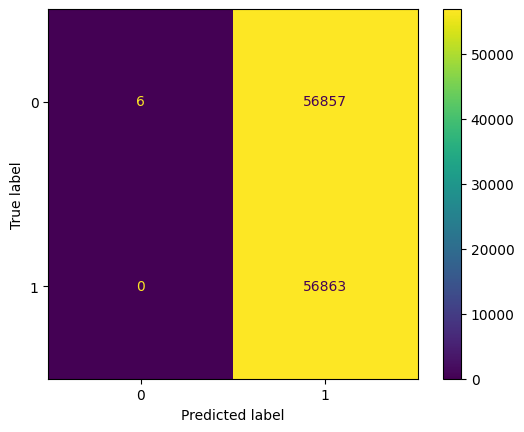

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)

In [ ]:
from joblib import dump, load
